In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, sys
from glob import glob

In [3]:
import psutil
import os
import time
import sys
import math
from contextlib import contextmanager

@contextmanager
def trace(title):
    t0 = time.time()
    p = psutil.Process(os.getpid())
    m0 = p.memory_info()[0] / 2. ** 30
    yield
    m1 = p.memory_info()[0] / 2. ** 30
    delta = m1 - m0
    sign = '+' if delta >= 0 else '-'
    delta = math.fabs(delta)
    print(f"[{m1:.1f}GB({sign}{delta:.1f}GB):{time.time() - t0:.1f}sec] {title} ", file=sys.stderr)

In [4]:
tar_files = []
for p in glob('../data/GSE117295_RAW/*csv'):
    if "CT" in p:
        tar_files.append(p)
tar_files.sort()

In [5]:
tar_files

['../data/GSE117295_RAW/GSM3290582_CT14.csv',
 '../data/GSE117295_RAW/GSM3290583_CT18.csv',
 '../data/GSE117295_RAW/GSM3290584_CT22.csv',
 '../data/GSE117295_RAW/GSM3290585_CT26.csv',
 '../data/GSE117295_RAW/GSM3290586_CT30.csv',
 '../data/GSE117295_RAW/GSM3290587_CT34.csv',
 '../data/GSE117295_RAW/GSM3290588_CT38.csv',
 '../data/GSE117295_RAW/GSM3290589_CT42.csv',
 '../data/GSE117295_RAW/GSM3290590_CT46.csv',
 '../data/GSE117295_RAW/GSM3290591_CT50.csv',
 '../data/GSE117295_RAW/GSM3290592_CT54.csv',
 '../data/GSE117295_RAW/GSM3290593_CT58.csv']

In [6]:
tar_files[0::3]

['../data/GSE117295_RAW/GSM3290582_CT14.csv',
 '../data/GSE117295_RAW/GSM3290585_CT26.csv',
 '../data/GSE117295_RAW/GSM3290588_CT38.csv',
 '../data/GSE117295_RAW/GSM3290591_CT50.csv']

In [7]:
df = pd.read_csv(tar_files[0]).astype(np.int8)
df = df.transpose()

In [11]:
df.head()

,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,...,n-R5s202,n-R5s210,n-R5s211,n-R5s213,n-R5s25,n-R5s33,n-R5s47,n-R5s7,n-R5s88,n-R5s96
TAAAGTCGTGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CATAACTGATGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAGTGTGTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAGTCGCCGTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCAGAAAGGATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.shape

(6563, 26469)

(0.0, 500.0)

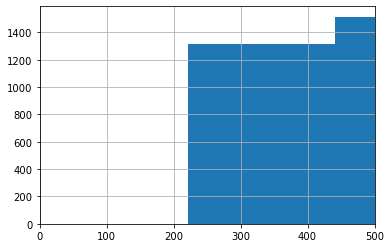

In [15]:
df.sum(1).hist(bins=100)
plt.xlim([0, 500])

In [18]:
df_mito = pd.read_csv('../data/mito_gene.csv', header=None)
df_mito.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ENSMUSG00000024442,66839.0,0610009O20Rik,RIKEN cDNA 0610009O20 gene,18,True,Known mitochondrial,True,NaN,1.0,0.970,0.8369,0.906
1,ENSMUSG00000027637,67388.0,1110008F13Rik,RIKEN cDNA 1110008F13 gene,2,True,Dubious gene,True,NaN,0.0,0.014,0.0519,0.099
2,ENSMUSG00000021023,66132.0,1110008L16Rik,RIKEN cDNA 1110008L16 gene,12,True,Known mitochondrial,True,NaN,0.0,0.215,0.7446,0.385
3,ENSMUSG00000019797,67851.0,1700021F05Rik,RIKEN cDNA 1700021F05 gene,10,True,Predicted mitochondrial,True,NaN,1.0,0.192,0.8992,0.601
4,ENSMUSG00000038323,73467.0,1700066M21Rik,UPF0565,1,True,Known mitochondrial,False,NaN,0.0,0.266,0.8348,0.706


In [21]:
df_mito.iloc[:, 2].value_counts()

Stx17     1
Cbr3      1
Uqcrc1    1
Ndufa2    1
Mrpl50    1
         ..
Gtpbp6    1
Slirp     1
Hagh      1
mt-Co2    1
Apex2     1
Name: 2, Length: 1157, dtype: int64

In [22]:
mito_gene = df_mito.iloc[:, 2].values

In [29]:
mito_gene_overlap = list(set(list(mito_gene)) & set(list(df.columns)))

In [33]:
len(mito_gene)

1157

In [32]:
len(mito_gene_overlap)

1108

(0.0, 50.0)

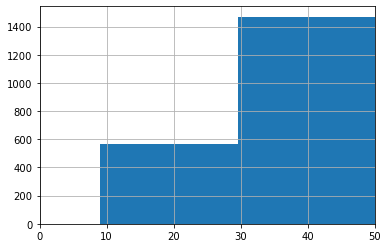

In [43]:
df.loc[:, mito_gene_overlap].sum(1).hist(bins=100)
plt.xlim([0, 50])

In [51]:
df.loc[:, mito_gene_overlap].sum(1).value_counts()

35     86
43     83
36     78
49     78
38     76
       ..
669     1
661     1
645     1
629     1
913     1
Length: 561, dtype: int64

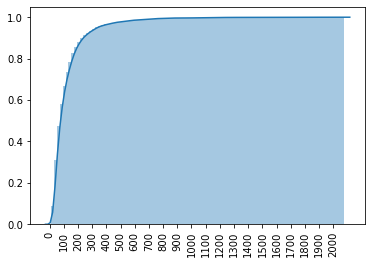

In [59]:
plt.figure()
sns.distplot(df.loc[:, mito_gene_overlap].sum(1), bins=100, kde_kws={"cumulative": True}, hist_kws={"cumulative": True})
plt.xticks(range(0, 2100, 100), rotation=90)
plt.show()

In [9]:
with trace("load csv, concat"):
    df = []
    for i, tar in enumerate(tar_files[0:2]):
        df_temp = pd.read_csv(tar).astype(np.uint16)
        df.append(df_temp)

[2.3GB(-0.6GB):24.7sec] load csv, concat 


In [ ]:
pd.concat(df, axis=0)

In [ ]:
df.head()

In [20]:
df_temp

0610007P14Rik    344
0610009B22Rik    397
0610009E02Rik     37
0610009L18Rik    169
0610009O20Rik    115
                ... 
n-R5s28            2
n-R5s40            1
n-R5s56            1
n-R5s88            1
n-R5s96            3
Length: 25910, dtype: int64

In [23]:
d = pd.read_csv(tar)

In [38]:
d.shape

(25910, 4939)

In [35]:
d.max(0).max()

3238

In [36]:
d.max(1).max()

3238

In [31]:
d.max(0)

ACATTCATGAGC      43
TCGTCCAATCCG      29
GGCTAAGGATTT       6
TGATAAGATTGA       8
CCTTTGACCTTN      20
                ... 
CTTTTCCTATCA     146
ATCCTCCAATCA     218
TTATGTTGTCCA     128
ATCCGGTCATAA     215
TAAAGGATCGGC    3238
Length: 4939, dtype: int64

In [37]:
"Agt" in d.index

True